# Model Tuning

In the Ames MLR notebook, I created a model called feamod based on a MLR algorithm built with engineered features.  Here I will fine tune the model and apply some regularization techniques.  Then change the model accordingly.

- [01-Prep the data](#section1)
- [02-Regularization](#section2)
    - [2a_Scale our data](#section2a)
    - [2b_Reg by Ridge](#section2b)
    - [2c_Reg by Lasso](#section2c)
    - [2d_Reg by ElasticNet](#section2d)
    - [2e_Nearest Neighbor KNN](#section2e)
- [03-Fine tune hyperparamaters](#section3)
    - [3a_Linear Regression Pipeline](#section3a)
    - [3b_RidgeCV Pipeline](#section3b)
    - [3c_LassoCV Pipeline](#section3c)
    - [3d_ElasticNetCV Pipeline](#section3d)
    - [3e_Nearest Neighbor Pipeline](#section3e)
- [04-Indentify a production model](#section4)
  

## 01-Prep the data. <a class="anchor" id="section1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge,RidgeCV, Lasso, LassoCV, ElasticNet,ElasticNetCV
from sklearn import metrics

In [71]:
#recall our feamod model
%store -r X
%store -r y
%store -r feamod
%store -r  X_train
%store -r  X_test
%store -r  y_train
%store -r  y_test

In [72]:
#Establishing our baseline score:
print(f'Feamod Train Score: {feamod.score(X_train,y_train)}')
print(f'Feamod Test Score: {feamod.score(X_test,y_test)}')
#which is 0.866 for Test

Feamod Train Score: 0.8331625014380573
Feamod Test Score: 0.8615624347309359


In [5]:
#Establishing our baseline score:
print(f'Feamod Train Score: {feamod.score(X_train,y_train)}')
print(f'Feamod Test Score: {feamod.score(X_test,y_test)}')
#which is 0.866 for Test

Feamod Train Score: 0.8331625014380573
Feamod Test Score: 0.8615624347309359


In [6]:
#Recall our coefficients:
%store -r coef_df
coef_df

,col_name,coef
22,allba,3.857201e+04
16,Neighborhood_NridgHt,3.079809e+04
21,Bsmt Exposure_Gd,2.100081e+04
0,Overall Qual,1.749303e+04
5,TotRms AbvGrd,1.590808e+04
14,Foundation_PConc,9.819034e+03
2,Garage Cars,7.351001e+03
6,Fireplaces,6.179993e+03
19,Fireplace Qu_Gd,3.218113e+03
20,Fireplace Qu_Gd,3.218113e+03


Among our lowest negative correlations are `house_to_lot_ratio` and `area_per_room`.  These numbers seem extreme.  But, our strongest correlation relationships of 
- `allba` : a count of all bathrooms in the house.
- `Neighborhood_NridgHt`: the North Ridge Height neighborhood district.
- `Bsmt Exposure_Gd`: asement exposure as a walkout or a garden level
- `Overall Qual`: an assessment of the overall quality of the house.    

seem to be strong relationships.  We will move on to regularization and scaling to see if it improves our model.

## 02-Regularization. <a class="anchor" id="section2"></a>

### 2a. Scale our data. <a class="anchor" id="section2a"></a>

In [70]:
sc = StandardScaler()
z_train=sc.fit_transform(X_train)
z_test=sc.fit_transform(X_test)
%store z_test
%store z_train

Stored 'z_test' (ndarray)
Stored 'z_train' (ndarray)


In [8]:
print(f'Z_train shape is: {z_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'Z_test shape is: {z_test.shape}')
print(f'y_test shape is: {y_test.shape}')

Z_train shape is: (1537, 27)
y_train shape is: (1537,)
Z_test shape is: (513, 27)
y_test shape is: (513,)


In [9]:
#lets test our z on a Linear Regression model
ols = LinearRegression()
ols.fit(z_train,y_train)

LinearRegression()

In [10]:
print(f'OLS Train Score: {ols.score(z_train,y_train)}')
print(f'OLS Test Score: {ols.score(z_test,y_test)}')

OLS Train Score: 0.8331625014380573
OLS Test Score: 0.856849729820014


  __Interpretation:__ Our test score did a little bit worse than the original of 0.866.  Since it is 0.86081, our model is not overfit.

### 2b Reg by Ridge <a class="anchor" id="section2b"></a>

In [11]:
#Let's regularize with Ridge
ridge10 = Ridge(alpha=10)
ridge1=Ridge(alpha=1)

ridge1.fit(z_train,y_train)
ridge10.fit(z_train,y_train)

Ridge(alpha=10)

In [12]:
print(f'Ridge, Alpha=1 Train Score: {ridge1.score(z_train,y_train)}')
print(f'Ridge, Alpha=1 Test Score: {ridge1.score(z_test,y_test)}')
print(f'Ridge, Alpha=10 Train Score: {ridge10.score(z_train,y_train)}')
print(f'Ridge, Alpha=10 Test Score: {ridge10.score(z_test,y_test)}')

Ridge, Alpha=1 Train Score: 0.8331521947247078
Ridge, Alpha=1 Test Score: 0.8576426196822479
Ridge, Alpha=10 Train Score: 0.8325656556242136
Ridge, Alpha=10 Test Score: 0.8624612138479191


 __Interpretation:__ Compared to the alpha=1 score, the `alpha10` test score did better.  So we will use that model.  
 But can we get alpha any better?

In [13]:
r_alphas = np.logspace(0,5,100)

In [14]:
ridge_cv=RidgeCV(alphas=r_alphas,scoring='r2',cv=5)
ridge_cv.fit(z_train,y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, scoring='r2')

In [15]:
print(f'RidgeCV Train Score: {ridge_cv.score(z_train,y_train)}')
print(f'RidgeCV Test Score: {ridge_cv.score(z_test,y_test)}')

RidgeCV Train Score: 0.8327277157632537
RidgeCV Test Score: 0.8616997434341844


__Interpretation__ Looks like alpha10 score did the best.

### 2c. Reg by Lasso <a class="anchor" id="section2c"></a>

In [16]:
#find lasso alphas to check
#l_alphas = np.logspace(-3,0,100)
l_alphas = np.linspace(670,800,num=100)

In [17]:
lasso_cv=LassoCV(alphas=l_alphas,cv=5, max_iter=5000)

In [68]:
lasso_cv.fit(z_train,y_train)
%store lasso_cv

Stored 'lasso_cv' (LassoCV)


In [19]:
print(f'LassoCV Train Score: {lasso_cv.score(z_train,y_train)}')
print(f'LassoCV Test Score: {lasso_cv.score(z_test,y_test)}')

LassoCV Train Score: 0.8281863248249373
LassoCV Test Score: 0.8676765871264231


### 2d. Reg by ElasticNet <a class="anchor" id="section2d"></a>

In [23]:
#taken from Tim Book's lecture on regularizations.

# Set up a list of alphas to check.
enet_alphas = np.linspace(0.5, 1.0, 100)

# Set up our l1 ratio. (What does this do?)
enet_ratio = 0.5

# Instantiate model.
enet = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)

# Fit model using optimal alpha.
enet = enet.fit(X_train, y_train)

# Evaluate model.
print(enet.score(X_train, y_train))
print(enet.score(X_test, y_test))

0.7988407280283552
0.8524306210684642


__Interpretation__ Our test score of 0.857515 is doing well, but ridge10 still does better.

In [ ]:
### 2e. Trying Nearest Neighbor KNN <a class="anchor" id="section2e"></a>

In [20]:
#Trying Nearest neighbor to understand it a bit more
knn = KNeighborsClassifier()
knn.fit(z_train,y_train)

KNeighborsClassifier()

In [21]:
knn.score(z_train,y_train)

0.1867273910214704

In [22]:
knn.score(z_test,y_test)

0.007797270955165692

__Interpretation__ Nearest neighbor is a terrible model for this example.

## 03-Fine tune hyperparamaters. <a class="anchor" id="section3"></a>

### 3a. Linear Regression Pipeline. <a class="anchor" id="section3a"></a>

In [24]:
pipe = Pipeline([
    ('pf', PolynomialFeatures()),
    ('ss', StandardScaler()),
    ('lcv', LinearRegression())
])
pipe.fit(X_train,y_train)

Pipeline(steps=[('pf', PolynomialFeatures()), ('ss', StandardScaler()),
                ('lcv', LinearRegression())])

In [25]:
print(f'Feamod Pipe Train Score: {pipe.score(X_train,y_train)}')
print(f'Feamod Pipe Test Score: {pipe.score(X_test,y_test)}')

Feamod Pipe Train Score: 0.9339989726851611
Feamod Pipe Test Score: 0.8689619230168217


In [26]:
#Linear Regression without Polynomial Features
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('lcv', LinearRegression())
])
pipe.fit(X_train,y_train)

Pipeline(steps=[('ss', StandardScaler()), ('lcv', LinearRegression())])

In [27]:
print(f'Feamod Pipe Train Score: {pipe.score(X_train,y_train)}')
print(f'Feamod Pipe Test Score: {pipe.score(X_test,y_test)}')

Feamod Pipe Train Score: 0.8331625014380573
Feamod Pipe Test Score: 0.8615624347309363


__Interpretation:__ Adding polnomial features created extreme overfitting.  After removing the polynomial features, I received the same score as before because this is just an easier way to do what I did in Step 2a.

### 3b. RidgeCV Pipeline. <a class="anchor" id="section3b"></a>

In [28]:
ridge_pipe = Pipeline([
    ('pf', PolynomialFeatures()),
    ('ss', StandardScaler()),
    ('rdg', RidgeCV())
])
ridge_pipe.fit(X_train,y_train)

Pipeline(steps=[('pf', PolynomialFeatures()), ('ss', StandardScaler()),
                ('rdg', RidgeCV(alphas=array([ 0.1,  1. , 10. ])))])

In [29]:
print(f'Ridge Pipe Train Score: {ridge_pipe.score(X_train,y_train)}')
print(f'Ridge Pipe Test Score: {ridge_pipe.score(X_test,y_test)}')

Ridge Pipe Train Score: 0.9257311548483708
Ridge Pipe Test Score: 0.8913788002187353


In [30]:
#Ridge Regularization with no polynomial
pipe_b2 = Pipeline([
    ('ss', StandardScaler()),
    ('rdg', Ridge())
])
pipe_b2.fit(X_train,y_train)

Pipeline(steps=[('ss', StandardScaler()), ('rdg', Ridge())])

In [31]:
print(f'Ridge Pipe Train Score: {pipe_b2.score(X_train,y_train)}')
print(f'Ridge Pipe Test Score: {pipe_b2.score(X_test,y_test)}')

Ridge Pipe Train Score: 0.8331521947247078
Ridge Pipe Test Score: 0.8620486776166785


In [32]:
pipe_b2.get_params()

{'memory': None,
 'steps': [('ss', StandardScaler()), ('rdg', Ridge())],
 'verbose': False,
 'ss': StandardScaler(),
 'rdg': Ridge(),
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'rdg__alpha': 1.0,
 'rdg__copy_X': True,
 'rdg__fit_intercept': True,
 'rdg__max_iter': None,
 'rdg__normalize': False,
 'rdg__random_state': None,
 'rdg__solver': 'auto',
 'rdg__tol': 0.001}

In [33]:
pipe_b2_params = {'rdg__alpha':[0,5,100]}

In [34]:
#GridSearchCV
pipe_b2_gridsearch=GridSearchCV(pipe_b2,pipe_b2_params,cv=5,verbose=1)
pipe_b2_gridsearch.fit(X_train, y_train);

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s finished


In [35]:
pipe_b2_gridsearch.score(X_test,y_test)

0.8635801749835691

__Interpretation:__ This model has a lower performance than the ridge10 model.  The train and test scores varied alot when the PolynomialFeatures were inputted, meaning overfit.  But, when I removed the PolynomialFeatures, the score was worse than the ridge10 model = 0.86651.  The GridSearchCV score was the very close to the ridge10, but ridge10 was still higher.

### 3c. LassoCV Pipeline. <a class="anchor" id="section3c"></a>

In [36]:
#Lasso with no PolynomialFeatures
lasso_np_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('lcv', LassoCV())
])
lasso_np_pipe.fit(X_train,y_train)

Pipeline(steps=[('ss', StandardScaler()), ('lcv', LassoCV())])

In [37]:
print(f'Lasso Pipe Train Score: {lasso_np_pipe.score(X_train,y_train)}')
print(f'Lasso Pipe Test Score: {lasso_np_pipe.score(X_test,y_test)}')

Lasso Pipe Train Score: 0.8329982534903774
Lasso Pipe Test Score: 0.8639573532043389


In [38]:
#Lasso with Polynomial
lasso_pipe = Pipeline([
    ('pf', PolynomialFeatures()),
    ('ss', StandardScaler()),
    ('lcv', LassoCV())
])
lasso_pipe.fit(X_train,y_train)

/Users/decca/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 961725375.6847534, tolerance: 750760399.1889355
  tol, rng, random, positive)
/Users/decca/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 893042202.487854, tolerance: 750760399.1889355
  tol, rng, random, positive)
/Users/decca/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 805470384.6176758, tolerance: 750760399.1889355
  tol, rng, random, positive)
/Users/decca/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: Convergen

Pipeline(steps=[('pf', PolynomialFeatures()), ('ss', StandardScaler()),
                ('lcv', LassoCV())])

In [39]:
print(f'Lasso Pipe Train Score: {lasso_pipe.score(X_train,y_train)}')
print(f'Lasso Pipe Test Score: {lasso_pipe.score(X_test,y_test)}')

Lasso Pipe Train Score: 0.9155523870987572
Lasso Pipe Test Score: 0.899990784445888


In [40]:
lasso_np_pipe.get_params()

{'memory': None,
 'steps': [('ss', StandardScaler()), ('lcv', LassoCV())],
 'verbose': False,
 'ss': StandardScaler(),
 'lcv': LassoCV(),
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'lcv__alphas': None,
 'lcv__copy_X': True,
 'lcv__cv': None,
 'lcv__eps': 0.001,
 'lcv__fit_intercept': True,
 'lcv__max_iter': 1000,
 'lcv__n_alphas': 100,
 'lcv__n_jobs': None,
 'lcv__normalize': False,
 'lcv__positive': False,
 'lcv__precompute': 'auto',
 'lcv__random_state': None,
 'lcv__selection': 'cyclic',
 'lcv__tol': 0.0001,
 'lcv__verbose': False}

In [41]:
lasso_np_pipe_params = {'ss__with_mean':[True,False],
              'lcv__normalize':[True,False]}

In [42]:
#GridsearchCV - did not run because although I did not get errors when I first ran pipe with polynomials, 
#I am getting convergence errors now. And this results in a massive error log
lasso_pipe_gridsearch=GridSearchCV(lasso_np_pipe,lasso_np_pipe_params,cv=5,verbose=1)
lasso_pipe_gridsearch.fit(X_train, y_train);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.0s finished


In [43]:
lasso_pipe_gridsearch.score(X_test,y_test)

0.8639573532043389

__Interpretation:__  The model performed better with a polynomial scaler, but not with a GridSearch (0.8638). So the alphas I used on the first iteration worked better. Something to note is that when I first ran this model, I didn't have errors.  But the second time and thereafter I recived alot of convergience errors.  According to Tim Book's lecture, it doesn't mean you have a bad model.  But the more I googled it the more I realized it could be a bad model because it may be too high variance.  So I will include it in my predictions and see how it performs. 

### 3d. ElasticNetCV Pipeline. <a class="anchor" id="section3d"></a>

In [44]:
#ElasticNet with Polynomial
enet_pipe = Pipeline([
    ('pf', PolynomialFeatures()),
    ('ss', StandardScaler()),
    ('ent', ElasticNet())
])
enet_pipe.fit(X_train,y_train)

/Users/decca/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 710005128973.5934, tolerance: 967057801.5200375
  positive)


Pipeline(steps=[('pf', PolynomialFeatures()), ('ss', StandardScaler()),
                ('ent', ElasticNet())])

In [45]:
print(f'ElasticNet Pipe Train Score: {enet_pipe.score(X_train,y_train)}')
print(f'ElasticNet Pipe Test Score: {enet_pipe.score(X_test,y_test)}')

ElasticNet Pipe Train Score: 0.882732126421254
ElasticNet Pipe Test Score: 0.8765336032669069


In [46]:
#ElasticNet with Polynomial
pipe_d2 = Pipeline([
    ('pf', PolynomialFeatures()),
    ('ss', StandardScaler()),
    ('ent', ElasticNetCV())
])
pipe_d2.fit(X_train,y_train)

Pipeline(steps=[('pf', PolynomialFeatures()), ('ss', StandardScaler()),
                ('ent', ElasticNetCV())])

In [47]:
print(f'ElasticNetCV Pipe Train Score: {pipe_d2.score(X_train,y_train)}')
print(f'ElasticNetCV Pipe Test Score: {pipe_d2.score(X_test,y_test)}')

ElasticNetCV Pipe Train Score: 0.6373806704267504
ElasticNetCV Pipe Test Score: 0.6591796140117299


__Interpretation__ Elastic Net CV did a terrible job.  While the Elastic Net did much better than the original Elastic Net.  So I will include ElasticNet pipe into my summary and predictions below for futher testing and comparison.

### 3e. Nearest Neighbor Pipeline. <a class="anchor" id="section3e"></a>

In [48]:
pipe_e = Pipeline([
    ('ss', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])
pipe_e.fit(X_train,y_train);

In [49]:
pipe_e.score(X_test,y_test)

0.009746588693957114

In [50]:
pipe_e.get_params()

{'memory': None,
 'steps': [('ss', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'ss': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [51]:
pipe_e_params = {'ss__with_mean':[True,False],
                 'knn__n_neighbors':[3,5,7,11],
                 'knn__weights':['uniform','distance']}

In [52]:
pipe_e_gridsearch = GridSearchCV(pipe_e, pipe_e_params, cv=5, verbose=1)
pipe_e_gridsearch.fit(X_train, y_train);

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/decca/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    3.2s finished


In [53]:
pipe_e_gridsearch.score(X_test,y_test)

0.025341130604288498

__Interpretation:__ The model did better with a GridSearchCV, but overall it is still terrible compared with other models for this dataset.

## 04-Identify a production model. <a class="anchor" id="section4"></a>

__Notes__    
Identify a production model. (This does not have to be your best performing Kaggle model, but rather the model that best answers your problem statement.)   
Refine and interpret your production model.

In [54]:
#predict for feamod
y_preds=feamod.predict(X_test)
feamod_rmse= metrics.mean_squared_error(y_test,y_preds)**0.5
feamod_rmse

29413.18420842595

In [55]:
#on testing, my predictions are wrong by 28,914 between:
min(y_test),max(y_test)

(12789, 555000)

In [56]:
#predict for ridge1
y_preds=ridge1.predict(z_test)
ridge1_mse=metrics.mean_squared_error(y_test,y_preds)**0.5
ridge1_mse

29826.68998542886

In [57]:
#predict for ridge10
y_preds=ridge10.predict(z_test)
ridge10_mse=metrics.mean_squared_error(y_test,y_preds)**0.5
ridge10_mse

29317.549027636047

In [58]:
#predict for ridge_cv
y_preds=ridge_cv.predict(z_test)
ridge_cv_mse=metrics.mean_squared_error(y_test,y_preds)**0.5
ridge_cv_mse

29398.593919621257

In [69]:
#predict for lasso CV
y_preds=lasso_cv.predict(z_test)
lasso_cv_mse=metrics.mean_squared_error(y_test,y_preds)**0.5
%store lasso_cv_mse
lasso_cv_mse

Stored 'lasso_cv_mse' (float64)


28756.326988372348

In [60]:
#predict for Lasso CV pipe with Polynomial Features
y_preds=lasso_pipe.predict(X_test)
lasso_pipe_mse=metrics.mean_squared_error(y_test,y_preds)**0.5
lasso_pipe_mse

24999.716106781085

In [61]:
#predict for ElasticNet
y_preds=enet.predict(z_test)
enet_mse=metrics.mean_squared_error(y_test,y_preds)**0.5
enet_mse

226720.78308578322

In [62]:
#predict for ElasticNet without Polynomial Features
y_preds=enet_pipe.predict(z_test)
enet_pipe_mse=metrics.mean_squared_error(y_test,y_preds)**0.5
enet_pipe_mse

64695480.28435347

In [63]:
#Note I did NOT include the enet_mse because it is too similar on a barchart to enet_mse
alg='feamod','ridge1','ridge10','ridge_cv','lasso_cv','lasso_pipe','enet'
method=feamod_mse,ridge1_mse,ridge10_mse,ridge_cv_mse,lasso_cv_mse,lasso_pipe_mse,enet_mse
pred_full=pd.DataFrame()
pred_full['algorithm'] = alg
pred_full['mse'] = method

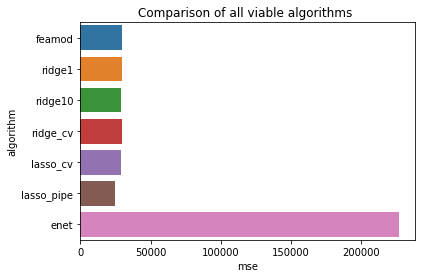

In [64]:
sns.barplot(pred_full['mse'], pred_full['algorithm'])
plt.title('Comparison of all viable algorithms ');

In [65]:
alg='feamod','ridge1','ridge10','ridge_cv','lasso_cv','lasso_pipe'
method=feamod_mse,ridge1_mse,ridge10_mse,ridge_cv_mse,lasso_cv_mse,lasso_pipe_mse
pred=pd.DataFrame()

In [66]:
pred['algorithm'] = alg
pred['mse'] = method

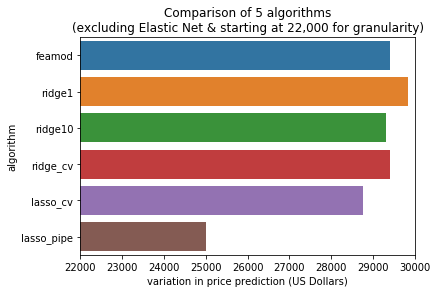

In [67]:
sns.barplot(pred['mse'], pred['algorithm'],)
plt.xlim(22_000,30_000)
plt.xlabel('variation in price prediction (US Dollars)')
plt.title('Comparison of 5 algorithms\n(excluding Elastic Net & starting at 22,000 for granularity)')
plt.savefig('./PPP/compare_5alg.png',bbox_inches='tight');

__Conclusion:__
The worst perfoming model was an ElasticNet with a prediction mse of \\$223,412 variation from predictions.  

The best prediction and scoring test was for the Lasso CV pipe.  It used Polynomial Features and the Lasso CV() regulariztion method.  BUT, there were many, many convergence warnings.  And, the train score (0.921) was higher than the test score (0.912).  This probably means the polynomial features have caused overfitting, ie. too much variance.  

The best prediction rate came from the Lasso CV model that uses regulariztion from Lasso CV with alpha = 10. Meaning that on testing, the predictions were wrong by \\$28,756 between a range of \\$12,789 and \\$555,000. 
It also had the best test score at 0.86651 (ie. 86.6% of the variation in y can be explained by the X variables.)
